In [ ]:
def mcp_neuron(inputs,weights,threshold):
  summation=sum(i*w for i, w in zip(inputs,weights))
  return 1 if summation>=threshold else 0
def AND(x1,x2):
  return mcp_neuron([x1,x2], [1,1],2)
def OR(x1,x2):
  return mcp_neuron([x1,x2], [1,1],1)
def NOT(x1):
  return mcp_neuron([x1], [-1],0)
def NOR(x1,x2):
  return mcp_neuron([x1,x2],[-1,-1],0)
def XOR(x1,x2):
  return (x1^x2)
print("AND")
for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(f"{x}->{AND(*x)}")
print("\nOR")
for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(f"{x}->{OR(*x)}")
print("\nNOT")
for x in [0,1]:
  print(f"{x}->{NOT(x)}")
print("\nNOR")
for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(f"{x}->{NOR(*x)}")
print("\nXOR")
for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(f"{x}->{XOR(*x)}")

AND
(0, 0)->0
(0, 1)->0
(1, 0)->0
(1, 1)->1

OR
(0, 0)->0
(0, 1)->1
(1, 0)->1
(1, 1)->1

NOT
0->1
1->0

NOR
(0, 0)->1
(0, 1)->0
(1, 0)->0
(1, 1)->0

XOR
(0, 0)->0
(0, 1)->1
(1, 0)->1
(1, 1)->0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = (X_train - np.mean(X_train, axis=0)) / (np.std(X_train, axis=0) + 1e-8)
X_test = (X_test - np.mean(X_train, axis=0)) / (np.std(X_train, axis=0) + 1e-8)

class LogisticRegressionModel:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            cost = -np.mean(y * np.log(y_predicted + 1e-8) + (1 - y) * np.log(1 - y_predicted + 1e-8))
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}/{self.num_iterations}, Cost: {cost:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)
lr_model = LogisticRegressionModel(learning_rate=0.01, num_iterations=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel accuracy on Test Set:", accuracy)

Iteration 100/1000, Cost: 0.2553
Iteration 200/1000, Cost: 0.1921
Iteration 300/1000, Cost: 0.1636
Iteration 400/1000, Cost: 0.1466
Iteration 500/1000, Cost: 0.1351
Iteration 600/1000, Cost: 0.1267
Iteration 700/1000, Cost: 0.1202
Iteration 800/1000, Cost: 0.1150
Iteration 900/1000, Cost: 0.1107
Iteration 1000/1000, Cost: 0.1071

Model accuracy on Test Set: 0.37719298245614036


<ipython-input-19-2037066624>:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 10 - loss: 0.0568, val-loss: 0.0825
Epoch 20 - loss: 0.0373, val-loss: 0.1001
Epoch 30 - loss: 0.0301, val-loss: 0.0981
Epoch 40 - loss: 0.0259, val-loss: 0.0968
Epoch 50 - loss: 0.0228, val-loss: 0.0959

Final Test Accuracy: 97.3684


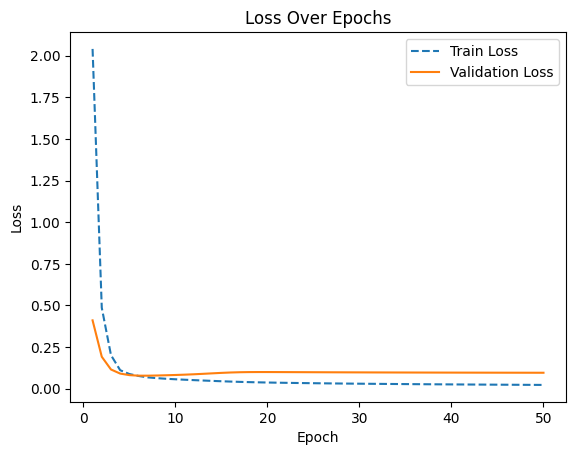

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
input_dim = X.shape[1]
hidden_dim = 10
output_dim = 1
w1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
w2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

losses = []
val_losses = []
for epoch in range(1, 51):
    z1 = np.dot(x_train, w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    train_loss = loss(y_train, a2)

    dz2 = a2 - y_train
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = (1 - np.power(a1, 2)) * np.dot(dz2, w2.T)
    dw1 = np.dot(x_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    w1 -= 0.01 * dw1
    b1 -= 0.01 * db1
    w2 -= 0.01 * dw2
    b2 -= 0.01 * db2
    z1_test = np.dot(x_test, w1) + b1
    a1_test = np.tanh(z1_test)
    z2_test = np.dot(a1_test, w2) + b2
    a2_test = sigmoid(z2_test)

    val_loss = loss(y_test, a2_test)

    losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - loss: {train_loss:.4f}, val-loss: {val_loss:.4f}")

y_pred = (a2_test > 0.5).astype(int)
accuracy = np.mean(y_pred == y_test) * 100
print(f"\nFinal Test Accuracy: {accuracy:.4f}")
plt.plot(range(1, 51), losses, label='Train Loss', linestyle='--')
plt.plot(range(1, 51), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9060 - loss: 0.3117 - val_accuracy: 0.9769 - val_loss: 0.0684
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9838 - loss: 0.0543 - val_accuracy: 0.9825 - val_loss: 0.0523
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9846 - val_loss: 0.0446
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9869 - val_loss: 0.0405
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9864 - val_loss: 0.0410


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.3649 - loss: 1.8430 - val_accuracy: 0.4612 - val_loss: 1.6013
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4073 - loss: 1.7240 - val_accuracy: 0.4612 - val_loss: 1.6036
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3882 - loss: 1.7163 - val_accuracy: 0.4612 - val_loss: 1.6015
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3954 - loss: 1.7197 - val_accuracy: 0.4612 - val_loss: 1.6049
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.3854 - loss: 1.7416 - val_accuracy: 0.4612 - val_loss: 1.6159
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4076 - loss: 1.6886 - val_accuracy: 0.4612 - val_loss: 1.6062
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3947 - loss: 1.7302 - val_accuracy: 0.4612 - val_loss: 1.6120
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4073 - loss: 1.7132 - val_accuracy: 0.4612 - v

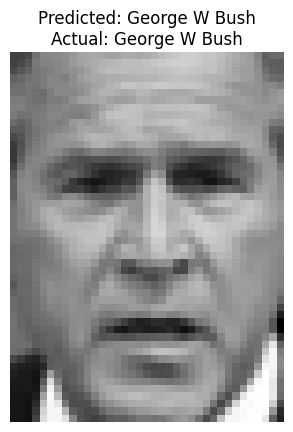

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_data.images
y = lfw_data.target
target_names = lfw_data.target_names
n_classes = len(target_names)
X = X.reshape(-1, X.shape[1], X.shape[2], 1) / 255.0
y = to_categorical(y, n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
def predict_and_display(index):
    sample = X_test[index].reshape(1, X.shape[1], X.shape[2], 1)
    prediction = model.predict(sample)
    predicted_label = target_names[np.argmax(prediction)]
    actual_label = target_names[np.argmax(y_test[index])]

    plt.imshow(X_test[index].reshape(X.shape[1], X.shape[2]), cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()
predict_and_display(5)
model.save("lfw_face_recognition_cnn.h5")



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 235s 295ms/step - accuracy: 0.6590 - loss: 0.9993 - val_accuracy: 0.7861 - val_loss: 0.6177
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 286ms/step - accuracy: 0.7961 - loss: 0.5807 - val_accuracy: 0.7969 - val_loss: 0.5890
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 289ms/step - accuracy: 0.8166 - loss: 0.5334 - val_accuracy: 0.7987 - val_loss: 0.5759
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 289ms/step - accuracy: 0.8216 - loss: 0.5109 - val_accuracy: 0.8013 - val_loss: 0.5762
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 291ms/step - accuracy: 0.8270 - loss: 0.4940 - val_accuracy: 0.8064 - val_loss: 0.5636
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.8053 - loss: 0.5668
Test Accuracy: 0.81
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step


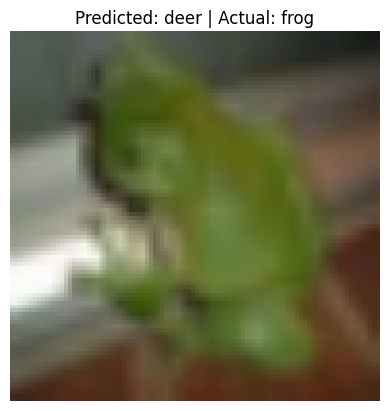

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = tf.image.resize(X_train, (96, 96))
X_test = tf.image.resize(X_test, (96, 96))

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_sample(index):
    sample = X_test[index].numpy().reshape(1, 96, 96, 3)
    prediction = model.predict(sample)
    pred_class = class_names[np.argmax(prediction)]
    actual_class = class_names[np.argmax(y_test[index])]

    plt.imshow(X_test[index].numpy())
    plt.title(f"Predicted: {pred_class} | Actual: {actual_class}")
    plt.axis('off')
    plt.show()
predict_sample(7)

model.save("transfer_learning_cifar10_model.h5")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1387 - loss: 1.3075 - val_accuracy: 0.0667 - val_loss: 1.3505
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1038 - loss: 1.2407 - val_accuracy: 0.1333 - val_loss: 1.2449
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1228 - loss: 1.2282 - val_accuracy: 0.1667 - val_loss: 1.1563
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1955 - loss: 1.1501 - val_accuracy: 0.2000 - val_loss: 1.0750
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3272 - loss: 1.0067 - val_accuracy: 0.3667 - val_loss: 1.0087

Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1008.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168 (676.00 B)

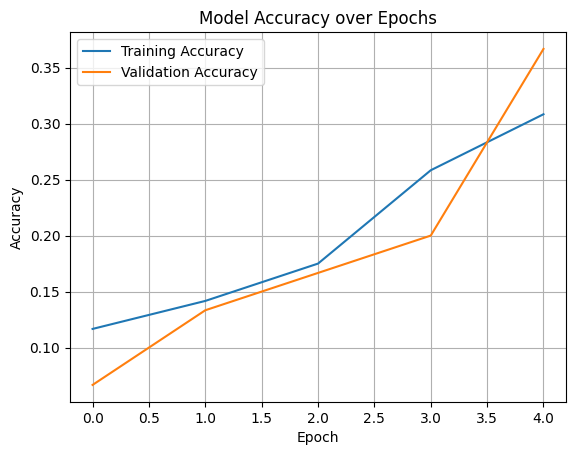

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_val, y_val), verbose=1)

print("\nModel Summary:")
model.summary()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Training CNN from scratch...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1119 - loss: 2.2812 - val_accuracy: 0.2125 - val_loss: 2.1516
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2412 - loss: 2.0258 - val_accuracy: 0.2800 - val_loss: 2.0096
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3114 - loss: 1.8626 - val_accuracy: 0.2725 - val_loss: 1.9025
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3522 - loss: 1.7308 - val_accuracy: 0.3250 - val_loss: 1.8264
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4249 - loss: 1.6013 - val_accuracy: 0.3925 - val_loss: 1.7510

Training Transfer Learning model...
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.1911 - loss: 2.2120 - val_accuracy: 0.3525 - val_loss: 1.9086
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4612 - loss: 1.6745 - val_accuracy: 0.3850 - val_loss: 1.7483
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5115 - loss: 1.4868 - val_accur

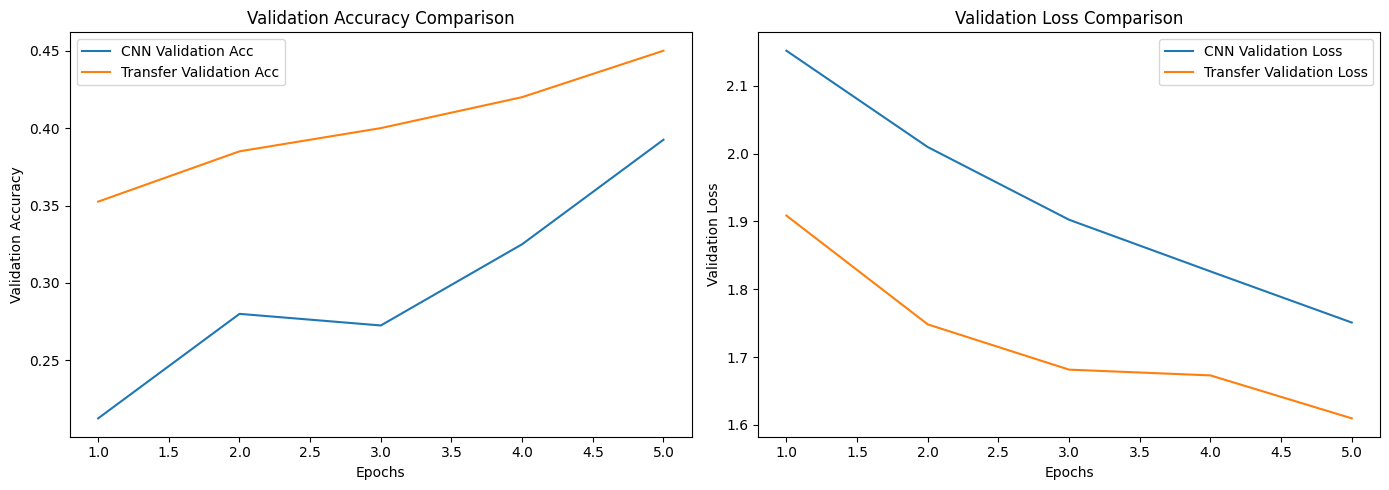


--- Results ---
CNN from scratch: Test Accuracy = 0.4100, Time = 5.09 sec
Transfer Learning (VGG16): Test Accuracy = 0.4797, Time = 6.44 sec


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
limit = 2000
X_train_limited, _, y_train_limited, _ = train_test_split(X_train_full, y_train_full, train_size=limit, stratify=y_train_full)

X_train_limited = X_train_limited / 255.0
X_test = X_test / 255.0
y_train_limited_cat = to_categorical(y_train_limited, 10)
y_test_cat = to_categorical(y_test, 10)
X_train, X_val, y_train, y_val = train_test_split(X_train_limited, y_train_limited_cat, test_size=0.2, random_state=42)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining CNN from scratch...")
start_time = time.time()
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)
cnn_time = time.time() - start_time

test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test, y_test_cat, verbose=0)

print("\nTraining Transfer Learning model...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False
transfer_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_transfer = transfer_model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)
transfer_time = time.time() - start_time
test_loss_transfer, test_acc_transfer = transfer_model.evaluate(X_test, y_test_cat, verbose=0)
epochs_range = range(1,6)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history_cnn.history['val_accuracy'], label='CNN Validation Acc')
plt.plot(epochs_range, history_transfer.history['val_accuracy'], label='Transfer Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs_range, history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.plot(epochs_range, history_transfer.history['val_loss'], label='Transfer Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.tight_layout()
plt.show()
print("\n--- Results ---")
print(f"CNN from scratch: Test Accuracy = {test_acc_cnn:.4f}, Time = {cnn_time:.2f} sec")
print(f"Transfer Learning (VGG16): Test Accuracy = {test_acc_transfer:.4f}, Time = {transfer_time:.2f} sec")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_texts = ['hi', 'what can you do', 'tell me a joke', 'see you later']
target_texts = ['<start> hello <end>', '<start> i can chat with you <end>', '<start> why did the chicken cross the road <end>', '<start> bye <end>']

tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(input_texts + target_texts)

input_seq = pad_sequences(tokenizer.texts_to_sequences(input_texts), padding='post')
target_seq = pad_sequences(tokenizer.texts_to_sequences(target_texts), padding='post')
decoder_target_data = np.expand_dims(target_seq, -1)

vocab_size = len(tokenizer.word_index) + 1
max_input_len = input_seq.shape[1]
max_target_len = target_seq.shape[1]

ed, lu = 32, 64
ei, di = Input((None,)), Input((None,))
ee, de = Embedding(vocab_size, ed)(ei), Embedding(vocab_size, ed)(di)
eo, sh, sc = LSTM(lu, return_sequences=True, return_state=True)(ee)
do, _, _ = LSTM(lu, return_sequences=True, return_state=True)(de, initial_state=[sh, sc])
attn = Attention()([do, eo])
out = Dense(vocab_size, activation='softmax')(Concatenate()([do, attn]))

model = Model([ei, di], out)
model.compile('adam', 'sparse_categorical_crossentropy')

encoder_model = Model(ei, [eo, sh, sc])

h, c, eo_in = Input((lu,)), Input((lu,)), Input((max_input_len, lu))
de2 = Embedding(vocab_size, ed)(di)
do2, h2, c2 = LSTM(lu, return_sequences=True, return_state=True)(de2, initial_state=[h, c])
attn2 = Attention()([do2, eo_in])
out2 = Dense(vocab_size, activation='softmax')(Concatenate()([do2, attn2]))
decoder_model = Model([di, eo_in, h, c], [out2, h2, c2])

def chat(input_text):
    seq = pad_sequences(tokenizer.texts_to_sequences([input_text]), maxlen=max_input_len, padding='post')
    eo, h, c = encoder_model.predict(seq, verbose=0)
    target, res = np.array([[tokenizer.word_index['<start>']]]), ''
    for _ in range(max_target_len):
        preds, h, c = decoder_model.predict([target, eo, h, c], verbose=0)
        idx = np.argmax(preds[0, -1]); word = tokenizer.index_word.get(idx, '')
        if word == '<end>': break
        res += word + ' '; target = np.array([[idx]])
    return res.strip()

epochs = 100
for e in range(1, epochs+1):
    model.fit([input_seq, target_seq], decoder_target_data, batch_size=1, epochs=1, verbose=0)
    if e % 10 == 0:
        print(f'Epoch {e} completed.')
        print("Test Input: tell me a joke")
        print("Bot Output:", chat("tell me a joke"))


Epoch 10 completed.
Test Input: tell me a joke
Bot Output: later later later later later later later why why
Epoch 20 completed.
Test Input: tell me a joke
Bot Output: later later later you later you why why why
Epoch 30 completed.
Test Input: tell me a joke
Bot Output: chat you you you you why why why
Epoch 40 completed.
Test Input: tell me a joke
Bot Output: you you you you you you why why why
Epoch 50 completed.
Test Input: tell me a joke
Bot Output: you you you you you why why why why
Epoch 60 completed.
Test Input: tell me a joke
Bot Output: you you you why why why why why why
Epoch 70 completed.
Test Input: tell me a joke
Bot Output: why why why why why why why why why
Epoch 80 completed.
Test Input: tell me a joke
Bot Output: why why why why why why why why why
Epoch 90 completed.
Test Input: tell me a joke
Bot Output: why why why why why why why why why
Epoch 100 completed.
Test Input: tell me a joke
Bot Output: why why why why why why why why why


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.5310 - loss: 0.6896 - val_accuracy: 0.6134 - val_loss: 0.6534
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.6931 - loss: 0.6052 - val_accuracy: 0.6530 - val_loss: 0.6108
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.7557 - loss: 0.5102 - val_accuracy: 0.7964 - val_loss: 0.4922
Test Accuracy: 0.80


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

english_sentences = ['hello', 'how are you', 'good morning']
french_sentences = ['bonjour', 'comment ça va', 'bonjour']

eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(english_sentences)
eng_seq = eng_tokenizer.texts_to_sequences(english_sentences)
eng_word_index = eng_tokenizer.word_index
eng_vocab_size = len(eng_word_index) + 1

fr_tokenizer = Tokenizer(filters='')
fr_tokenizer.fit_on_texts(['<start> ' + sent + ' <end>' for sent in french_sentences])
fr_seq = fr_tokenizer.texts_to_sequences(['<start> ' + sent + ' <end>' for sent in french_sentences])
fr_word_index = fr_tokenizer.word_index
fr_index_word = {i: w for w, i in fr_word_index.items()}
fr_vocab_size = len(fr_word_index) + 1

max_eng_len = max(len(seq) for seq in eng_seq)
max_fr_len = max(len(seq) for seq in fr_seq)

encoder_input_data = pad_sequences(eng_seq, maxlen=max_eng_len, padding='post')
decoder_input_data = pad_sequences([s[:-1] for s in fr_seq], maxlen=max_fr_len-1, padding='post')
decoder_target_data = pad_sequences([s[1:] for s in fr_seq], maxlen=max_fr_len-1, padding='post')
decoder_target_data = np.expand_dims(decoder_target_data, -1)

embedding_dim = 64
latent_dim = 128

encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(eng_vocab_size, embedding_dim)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state=True)(enc_emb)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(fr_vocab_size, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm_layer = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm_layer(dec_emb, initial_state=encoder_states)

decoder_dense = Dense(fr_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=2, epochs=300, verbose=0)

encoder_model_inf = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb_inf = dec_emb_layer(decoder_inputs)
decoder_outputs_inf, state_h_inf, state_c_inf = decoder_lstm_layer(dec_emb_inf, initial_state=decoder_states_inputs)
decoder_states_inf = [state_h_inf, state_c_inf]
decoder_outputs_inf = decoder_dense(decoder_outputs_inf)

decoder_model_inf = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs_inf] + decoder_states_inf
)

def translate(input_text):
    input_seq = eng_tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_eng_len, padding='post')

    states = encoder_model_inf.predict(input_seq, verbose=0)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = fr_word_index['<start>']

    stop_condition = False
    translated_sentence = []

    while not stop_condition:
        output_tokens, h, c = decoder_model_inf.predict([target_seq] + states, verbose=0)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = fr_index_word.get(sampled_token_index, '')

        if sampled_word == '<end>' or len(translated_sentence) > max_fr_len:
            stop_condition = True
        else:
            translated_sentence.append(sampled_word)

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states = [h, c]

    return ' '.join(translated_sentence)

print("English: how are you")
print("French : ", translate("how are you"))


English: how are you
French :  comment ça va


Epoch 0 — D loss: 0.6536, G loss: 0.6941


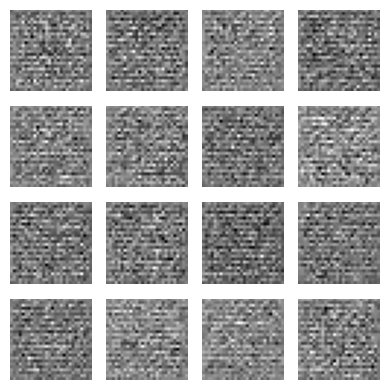

Epoch 200 — D loss: 0.9521, G loss: 0.3747


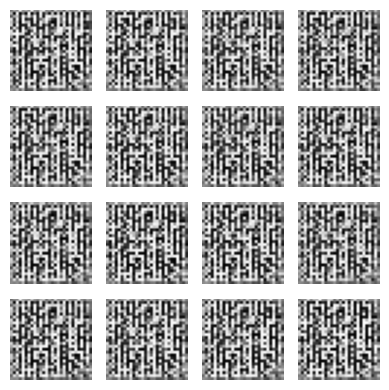

Epoch 400 — D loss: 1.2546, G loss: 0.2331


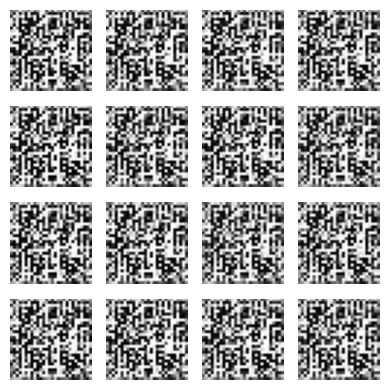

Epoch 600 — D loss: 1.4520, G loss: 0.1717


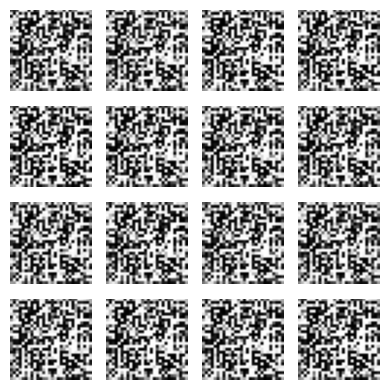

Epoch 800 — D loss: 1.5846, G loss: 0.1380


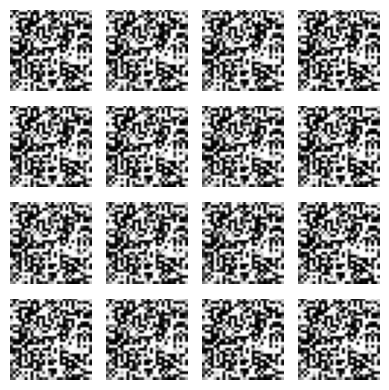

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.optimizers import Adam

(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

def build_generator():
    model = Sequential([
        Dense(128 * 7 * 7, input_dim=100),
        LeakyReLU(0.2),
        Reshape((7, 7, 128)),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(0.2),
        Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh')
    ])
    return model

def build_discriminator():
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(28, 28, 1)),
        LeakyReLU(0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False
gan_input = tf.keras.Input(shape=(100,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

def show_images():
    noise = np.random.normal(0, 1, (16, 100))
    gen_imgs = generator.predict(noise, verbose=0)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.tight_layout()
    plt.show()

def train_gan(epochs=1000, batch_size=128):
    half_batch = batch_size // 2
    for epoch in range(epochs):

        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_imgs = generator.predict(noise, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))

        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_y)

        if epoch % 200 == 0:
            print(f"Epoch {epoch} — D loss: {0.5*(d_loss_real[0]+d_loss_fake[0]):.4f}, G loss: {g_loss:.4f}")
            show_images()
train_gan(epochs=1000, batch_size=128)
